In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
 
tf.keras.__version__

'3.8.0'

In [15]:
train_data_path = "train"
validation_data_path = r"val"
 

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [17]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [18]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 
training_data.class_indices

Found 1951 images belonging to 4 classes.


{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [19]:
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


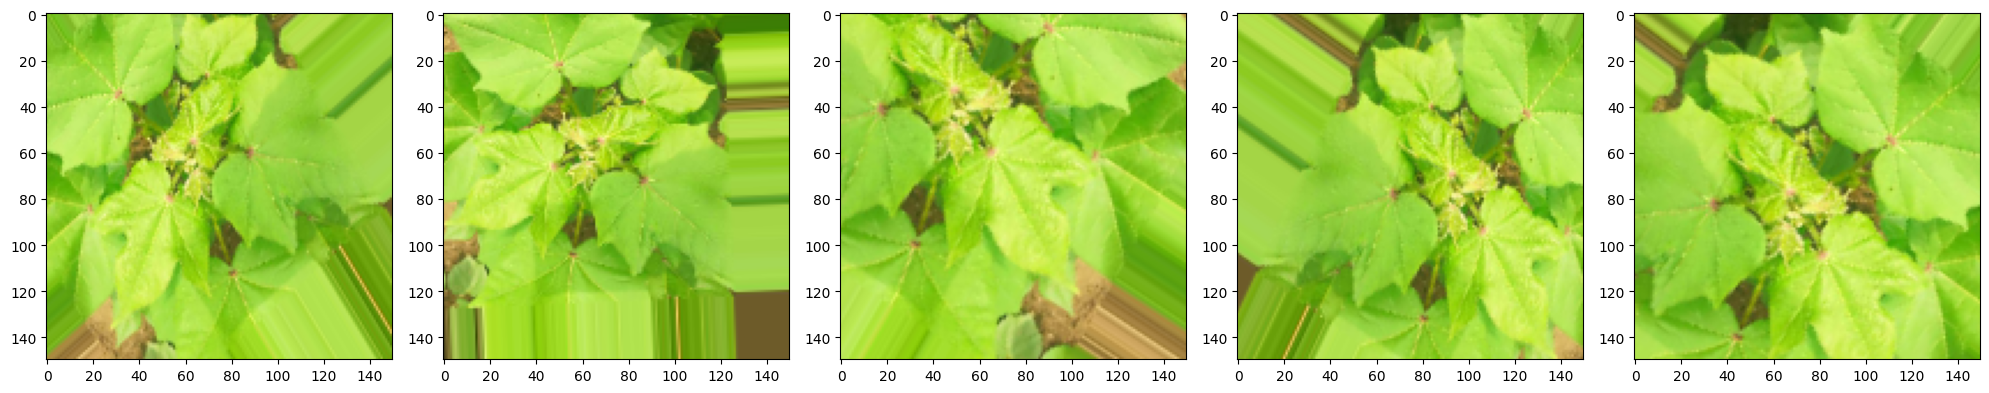

In [21]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [22]:
model_path = r".\model\v3_pred_cott_dis.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [24]:
cnn_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(filters=64, kernel_size=3),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(filters=128, kernel_size=3),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    tf.keras.layers.Conv2D(filters=256, kernel_size=3),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    tf.keras.layers.Dropout(0.5),                                                                        
                                    tf.keras.layers.Flatten(), # neural network beulding
                                    tf.keras.layers.Dense(units=128, activation='relu'), # input layers
                                    tf.keras.layers.Dropout(0.1),                                    
                                    tf.keras.layers.Dense(units=256, activation='relu'),                                    
                                    tf.keras.layers.Dropout(0.25),                                    
                                    tf.keras.layers.Dense(units=4, activation='softmax') # output layer
])

c:\Users\Administrator\OneDrive\Desktop\Efficient8\Deep Learning\Deep_Learning_2024\Cotten Disease\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [26]:
history = cnn_model.fit(training_data, 
                          epochs=20, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 
 

c:\Users\Administrator\OneDrive\Desktop\Efficient8\Deep Learning\Deep_Learning_2024\Cotten Disease\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.4237 - loss: 1.2993
Epoch 1: val_accuracy improved from -inf to 0.49074, saving model to .\model\v3_pred_cott_dis.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 61s 911ms/step - accuracy: 0.4242 - loss: 1.2982 - val_accuracy: 0.4907 - val_loss: 1.1096
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.5337 - loss: 1.0683
Epoch 2: val_accuracy improved from 0.49074 to 0.56790, saving model to .\model\v3_pred_cott_dis.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 54s 879ms/step - accuracy: 0.5342 - loss: 1.0675 - val_accuracy: 0.5679 - val_loss: 0.9432
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.6062 - loss: 0.9592
Epoch 3: val_accuracy did not improve from 0.56790
61/61 ━━━━━━━━━━━━━━━━━━━━ 47s 775ms/step - accuracy: 0.6064 - loss: 0.9589 - val_accuracy: 0.5340 - val_loss: 1.0233
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.6171 - loss: 0.9029
Epoch 4: val_accuracy did not improve from 0.56790
61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 798ms/step - accuracy: 0.6173 - loss: 0.9025 - val_accuracy: 0.5525 - val_loss: 0.9849
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - accuracy: 0.6694 - loss: 0.8345
Epoch 5: val_accuracy improved from 0.56790 to 0.60185, saving model to .\model\v3_pred_cott_dis.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 47s 770ms/step - accuracy: 0.6693 - loss: 0.8344 - val_accuracy: 0.6019 - val_loss: 0.9240
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.6537 - loss: 0.8438
Epoch 6: val_accuracy improved from 0.60185 to 0.71605, saving model to .\model\v3_pred_cott_dis.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 809ms/step - accuracy: 0.6539 - loss: 0.8437 - val_accuracy: 0.7160 - val_loss: 0.7040
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.6531 - loss: 0.8552
Epoch 7: val_accuracy did not improve from 0.71605
61/61 ━━━━━━━━━━━━━━━━━━━━ 48s 791ms/step - accuracy: 0.6532 - loss: 0.8548 - val_accuracy: 0.7068 - val_loss: 0.6994
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.7029 - loss: 0.7451
Epoch 8: val_accuracy did not improve from 0.71605
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 736ms/step - accuracy: 0.7029 - loss: 0.7453 - val_accuracy: 0.6698 - val_loss: 0.7730
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - accuracy: 0.6875 - loss: 0.7706
Epoch 9: val_accuracy did not improve from 0.71605
61/61 ━━━━━━━━━━━━━━━━━━━━ 46s 758ms/step - accuracy: 0.6874 - loss: 0.7709 - val_accuracy: 0.6636 - val_loss: 0.7927
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.7184 - loss: 0.7164
Epoch 10: val_accuracy did not

61/61 ━━━━━━━━━━━━━━━━━━━━ 47s 771ms/step - accuracy: 0.7121 - loss: 0.7224 - val_accuracy: 0.7531 - val_loss: 0.6167
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.7125 - loss: 0.7101
Epoch 13: val_accuracy did not improve from 0.75309
61/61 ━━━━━━━━━━━━━━━━━━━━ 52s 851ms/step - accuracy: 0.7126 - loss: 0.7101 - val_accuracy: 0.7006 - val_loss: 0.6869
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.7276 - loss: 0.6730
Epoch 14: val_accuracy improved from 0.75309 to 0.81790, saving model to .\model\v3_pred_cott_dis.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 50s 802ms/step - accuracy: 0.7276 - loss: 0.6732 - val_accuracy: 0.8179 - val_loss: 0.4957
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.7482 - loss: 0.6343
Epoch 15: val_accuracy did not improve from 0.81790
61/61 ━━━━━━━━━━━━━━━━━━━━ 46s 749ms/step - accuracy: 0.7483 - loss: 0.6345 - val_accuracy: 0.7315 - val_loss: 0.6849
Epoch 16/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.7799 - loss: 0.5697
Epoch 16: val_accuracy did not improve from 0.81790
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 738ms/step - accuracy: 0.7798 - loss: 0.5700 - val_accuracy: 0.6111 - val_loss: 0.9278
Epoch 17/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.7738 - loss: 0.5978
Epoch 17: val_accuracy did not improve from 0.81790
61/61 ━━━━━━━━━━━━━━━━━━━━ 52s 849ms/step - accuracy: 0.7740 - loss: 0.5974 - val_accuracy: 0.7130 - val_loss: 0.6483
Epoch 18/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.7863 - loss: 0.5593
Epoch 18: val_accuracy d

61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 738ms/step - accuracy: 0.8070 - loss: 0.4932 - val_accuracy: 0.8704 - val_loss: 0.3187
Epoch 20/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.7891 - loss: 0.5265
Epoch 20: val_accuracy did not improve from 0.87037
61/61 ━━━━━━━━━━━━━━━━━━━━ 47s 774ms/step - accuracy: 0.7893 - loss: 0.5262 - val_accuracy: 0.7685 - val_loss: 0.6016


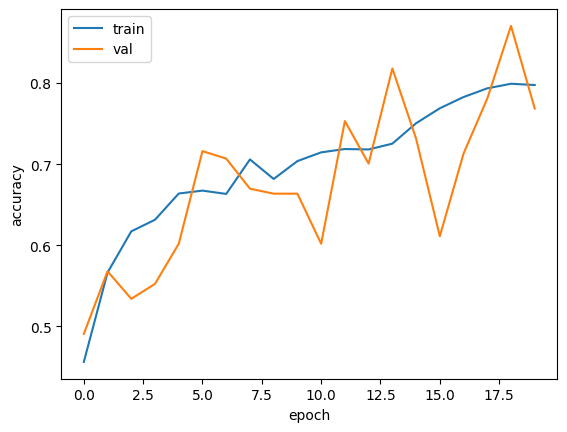

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

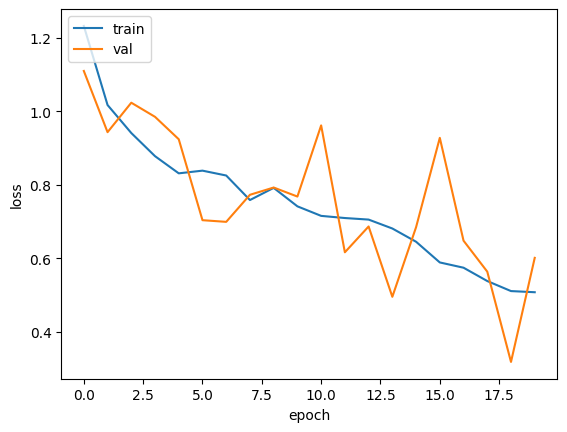

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
history.history

{'accuracy': [0.4561763107776642,
  0.5663762092590332,
  0.6171194314956665,
  0.6314710378646851,
  0.6637621521949768,
  0.6673500537872314,
  0.6632496118545532,
  0.7057918906211853,
  0.6817017197608948,
  0.7037416696548462,
  0.7145053744316101,
  0.7186058163642883,
  0.7180932760238647,
  0.725269079208374,
  0.7503843903541565,
  0.768836498260498,
  0.782675564289093,
  0.7934392690658569,
  0.7990773916244507,
  0.7975397109985352],
 'loss': [1.232047200202942,
  1.0170422792434692,
  0.9409331679344177,
  0.8780019879341125,
  0.8313309550285339,
  0.8386257886886597,
  0.8254079818725586,
  0.7587555646896362,
  0.7918146252632141,
  0.7416208386421204,
  0.7156966924667358,
  0.7098428010940552,
  0.7056116461753845,
  0.6813802719116211,
  0.6453856825828552,
  0.5891193747520447,
  0.5747972130775452,
  0.5385690927505493,
  0.5112836956977844,
  0.5081369876861572],
 'val_accuracy': [0.49074074625968933,
  0.5679012537002563,
  0.5339506268501282,
  0.552469134330749